In [ ]:
## Logistic Regression classifier for Tweet classification

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import unicodedata as ud
from sklearn.metrics import precision_recall_fscore_support as prfs
import csv
import HTMLParser
from sklearn.metrics import classification_report
from sklearn.cross_validation import cross_val_score
from numpy import random
from nltk.stem.porter import PorterStemmer as porterStemmer
from itertools import izip
import collections
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [2]:
def cleanTweet(originalTweet):
    htmlParser = HTMLParser.HTMLParser()

    tweet = originalTweet
    #tweet = htmlParser.unescape(originalTweet);
    #tweet = tweet.decode('windows-1252').encode('ascii', 'ignore')
    #tweet = tweet.decode('windows-1252')
    #tweet = tweet.decode("utf8").encode('ascii', 'ignore')
    #tweet = re.sub(r'[^\x00-\xFF]+', r'', tweet)
    #tweet = re.sub(r'[^\x00-\x7F]+', r'', tweet)
    #tweet = tweet.decode('utf-8').strip()
    #tweet = tweet.decode('unicode_escape').encode('ascii','ignore')
    #tweet = tweet.encode('ascii','ignore')
    tweet = ''.join([i if ord(i) < 128 else ' ' for i in tweet])
    
    # remove URLs in tweet
    tweet = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', tweet)

    # remove strings starting with @ in tweet
    tweet = re.sub(r'(\s)@\w+', r'', tweet)
    tweet = re.sub(r'@\w+', r'', tweet)
    
    # remove HTML tags from tweet
    tweet = re.sub('<[^<]+?>', '', tweet)

    # separates words joined with capital words.
    # E.g. DisplayIsAweson to Display Is Awesom
    #tweet = " ".join(re.findall('[A-Z][^A-Z]*', tweet));

    # remove exclamations
    tweet = re.sub(r'[<>!#@$:.,%\?-]+', r'', tweet)

    # remove extra white spaces
    tweet = re.sub(r'\s+', r' ', tweet)
    
    # stemming
    stemmer = porterStemmer()
    stemmedTweet = [stemmer.stem(word) for word in tweet.split(" ")]
    stemmedTweet = " ".join(stemmedTweet)
    
    tweet = str(stemmedTweet)
    tweet = tweet.replace("'", "")
    
    return tweet

In [3]:
trainData = pd.read_csv("A:\\new_Sync\\Box Sync\\academics\\sem3\\491\\assignments\\hw4\\data\\train2Columns.csv")

In [4]:
testData = pd.read_csv("A:\\new_Sync\\Box Sync\\academics\\sem3\\491\\assignments\\hw4\\data\\test2Columns.csv")

In [5]:
trainData.shape
#data.head(2)

(80000, 2)

In [6]:
rawTweetsSeries = trainData['tweets'];
tweetLabels = trainData['class'];

In [7]:
rawTestTweetsSeries = testData['tweets'];
testTweetLabels = testData['class'];

In [8]:
rawTestTweetsList = rawTestTweetsSeries.tolist()
testTweetLabelList = testTweetLabels.tolist()

In [9]:
rawTweetsList = rawTweetsSeries.tolist()
tweetLabelList = tweetLabels.tolist()

In [10]:
print (len(rawTweetsList))
print (rawTweetsList[0])
print (len(rawTestTweetsList))
print (rawTestTweetsList[0])

80000
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
359
@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right.


In [11]:
randomTweets = random.choice(rawTweetsList, 3)
print (randomTweets)
randomTestTweets = random.choice(rawTestTweetsList, 3)
print (randomTestTweets)

[ 'Up, showered, &amp; getting ready 4 church...wanting 3 more hours of sleep, but sooo...ready 2 serve 2day &amp; get a word from J.Rags. '
 'is getting ready to go see PARAMORE and NO DOUBT '
 "@rehna_tu I'd been waitin' for your return to knock on my twitter door. "]
['I am happy for Philip being at GoogleIO today'
 '@faithbabywear Ooooh, what model are you getting??? I have the 40D and LOVE LOVE LOVE LOVE it!'
 'HATE safeway select green tea icecream! bought two cartons, what a waste of money.  &gt;_&lt;']


In [12]:
i = 0;
cleanedTweetsList = []
for tweet in rawTweetsList:
    #tweet.encode('utf-8').strip()
    #tweet = tweet.decode("utf8").encode('ascii', 'ignore')
    #print (i ,),
    cleanedTweet = cleanTweet(tweet).encode('ascii', 'ignore').strip();
    cleanedTweetsList.append(cleanedTweet);
    i += 1

In [13]:
j = 0;
cleanedTestTweetsList = []
for tweet in rawTestTweetsList:
    cleanedTestTweet = cleanTweet(tweet).encode('ascii', 'ignore').strip();
    cleanedTestTweetsList.append(cleanedTestTweet);
    j += 1

In [14]:
randomTweets = random.choice(cleanedTweetsList, 3)
print (randomTweets)
randomTestTweets = random.choice(cleanedTestTweetsList, 3)
print (randomTestTweets)

['I hate twitter right nowwel mostli Mike tweet'
 'is current upload the pictur from the concert Hahaha Comment'
 'yayi I enjoy see anna on a daili basi haha make my decoupag then hope go to the gym woop it friday']
['My dentist appt today wa actual quit enjoy'
 'I final got around to use jqueri to make my bio collaps Yay for slide anim'
 'i love Dwight Howard vitamin water commerci now i wish he wa with NIKE and not adida lol']


In [15]:
# Create feature vectors
vectorizer = TfidfVectorizer(min_df=0.000125,
                             max_df = 0.75,
                             sublinear_tf=True,
                             use_idf=True)

In [16]:
lrClassifier = LogisticRegression()

In [17]:
trainVectors = vectorizer.fit_transform(cleanedTweetsList)
trainVectors.shape

(80000, 4661)

In [18]:
testVectors = vectorizer.transform(cleanedTestTweetsList)
testVectors.shape

(359, 4661)

In [19]:
lrClassifier.fit(trainVectors, tweetLabelList)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
predictedLabels = lrClassifier.predict(testVectors)

In [21]:
predictedLabelList = predictedLabels.tolist()

In [22]:
classActual = np.array(testTweetLabels)
classPredicted = np.array(predictedLabelList)

In [23]:
#prfs(classActual, classPredicted)

In [24]:
target_names = ['0', '1']

In [25]:
print(classification_report(testTweetLabels, predictedLabelList, target_names=target_names))

             precision    recall  f1-score   support

          0       0.84      0.73      0.78       177
          1       0.77      0.86      0.81       182

avg / total       0.80      0.80      0.80       359



In [26]:
print("Confusion matrix")
print (confusion_matrix(testTweetLabels, predictedLabels))

Confusion matrix
[[129  48]
 [ 25 157]]


In [27]:
counter=collections.Counter(testTweetLabels)
print("Actual values: "),
print (counter)

Actual values:  Counter({1: 182, 0: 177})


In [28]:
counter=collections.Counter(predictedLabels)
print("Actual values: "),
print(counter)

Actual values:  Counter({1: 205, 0: 154})


In [29]:
testAccuracy = lrClassifier.score(testVectors, testTweetLabels)
print ("Test accuracy:"),
print (testAccuracy)

Test accuracy: 0.796657381616


In [30]:
trainAccuracy = lrClassifier.score(trainVectors, tweetLabels)
print ("Train accuracy:"),
print (trainAccuracy)

Train accuracy: 0.79905


In [31]:
#predictionProbabilities = lrClassifier.predict_proba(trainVectors)

predictionProbabilities = lrClassifier.predict_proba(testVectors)

zeroProbs = predictionProbabilities[:, 1]
oneProbs = predictionProbabilities[:, 0]

In [32]:
predictionProbabilities = lrClassifier.predict_proba(testVectors)
zeroProbs = predictionProbabilities[:, 1]
oneProbs = predictionProbabilities[:, 0]
topFiveOne = oneProbs.argsort()[-5:][::-1]

In [33]:
print ("Correctly classified probabilities:")
print ("------------------------------------------------------------------------------")
print ("tweetid \t tweet \t actual label \t predited label \t prediction probability");
print ("------------------------------------------------------------------------------")
for x in topFiveOne:
    print (x),
    print (rawTestTweetsList[x]),
    print (testTweetLabelList[x]),
    print (predictedLabelList[x])
    print (predictionProbabilities[x][0])

Correctly classified probabilities:
------------------------------------------------------------------------------
tweetid 	 tweet 	 actual label 	 predited label 	 prediction probability
------------------------------------------------------------------------------
164 @springsingfiend @dvyers @sethdaggett @jlshack AT&amp;T dropped the ball and isn't supporting crap with the new iPhone 3.0... FAIL #att SUCKS!!! 0 0
0.99192340055
159 @Mbjthegreat i really dont want AT&amp;T phone service..they suck when it comes to having a signal 0 0
0.98651545001
222 Comcast sucks. 0 0
0.985496037769
128 THE DENTIST LIED! " U WON'T FEEL ANY DISCOMORT! PROB WON'T EVEN NEED PAIN PILLS" MAN U TWIPPIN THIS SHIT HURT!! HOW MANY PILLS CAN I TAKE!! 0 0
0.98440514928
79 I hate revision, it's so boring! I am totally unprepared for my exam tomorrow :( Things are not looking good... 0 0
0.978076941537


In [34]:
cvScores = cross_val_score(lrClassifier, trainVectors, tweetLabelList, cv=10)
print ("Cross validation scores:"),
print (cvScores)
print ("Mean: ", cvScores.mean())
print ("Minimum: ", cvScores.min())
print ("Maximum: ", cvScores.max())

Cross validation scores: [ 0.771     0.781     0.763125  0.773875  0.776625  0.764625  0.774875
  0.78175   0.7735    0.7685  ]
('Mean: ', 0.77288750000000006)
('Minimum: ', 0.76312500000000005)
('Maximum: ', 0.78174999999999994)


In [35]:
xAxis = [x for x in range(1,13)]

In [36]:
yAxis = cvScores.tolist()

In [37]:
yAxis.extend([trainAccuracy, testAccuracy])

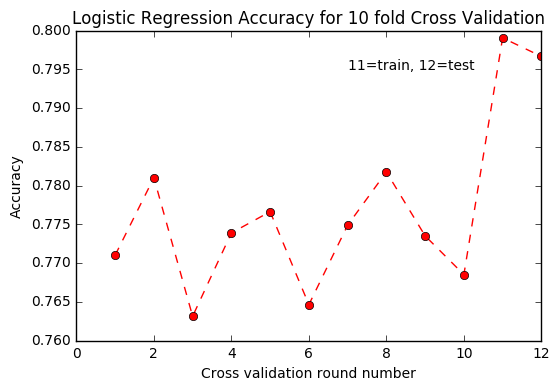

In [38]:
plt.plot(xAxis, yAxis, marker='o', linestyle='--', color='r')
plt.xlabel("Cross validation round number")
plt.ylabel("Accuracy")
plt.title("Logistic Regression Accuracy for 10 fold Cross Validation")
plt.text(7, .795, "11=train, 12=test")
plt.show()

In [39]:
# Question 7

In [40]:
#fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
fpr, tpr, thresholds = metrics.roc_curve(testTweetLabelList, predictedLabelList)
roc_auc = auc(fpr, tpr)

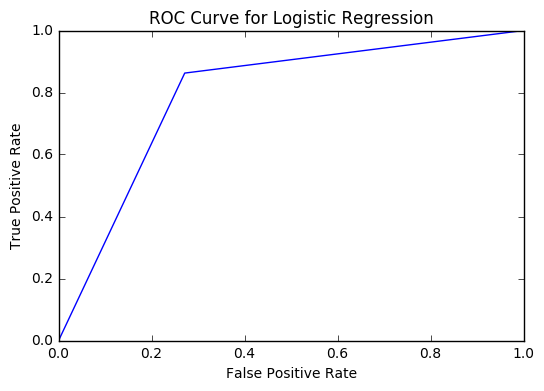

In [41]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.show()

In [42]:
# Question 8

In [43]:
featureNames = vectorizer.get_feature_names()
coefficientArray = lrClassifier.coef_[0]
top20Features = coefficientArray.argsort()[-20:][::-1]

In [44]:
print ("Top 20 features:")
for x in top20Features:
    print (featureNames[x]),

Top 20 features:
thank glad happi welcom love amaz good smile awesom cute proud yay congrat hehe cool excit you great funni nice
